In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.pyplot import plot, draw, show
from scipy.linalg import lu
import scipy.linalg as la
import random
import simpy
import math
import seaborn as sns
from operator import itemgetter

In [2]:
plt.rcParams['figure.figsize'] = [15, 5]

def plotpretify(ax, maxx, minx=0, miny=None, maxy=None, 
                Grid=True, LB=True, LL=True):
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        top=False,
        labelbottom=LB,
        left=False,
        right=False,
        labelleft=LL)
    ax.grid(Grid)
    
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)

In [3]:
def partition(array, begin, end):
    pivot = begin
    for i in range(begin+1, end+1):
        if array[i] <= array[begin]:
            pivot += 1
            array[i], array[pivot] = array[pivot], array[i]
    array[pivot], array[begin] = array[begin], array[pivot]
    return pivot



def quicksort(array, begin=0, end=None):
    if end is None:
        end = len(array) - 1
    def _quicksort(array, begin, end):
        if begin >= end:
            return
        pivot = partition(array, begin, end)
        _quicksort(array, begin, pivot-1)
        _quicksort(array, pivot+1, end)
    return _quicksort(array, begin, end)

array = [97, 200, 100, 101, 211, 107]
quicksort(array)
print(array)

[97, 100, 101, 107, 200, 211]


3.251520958875359


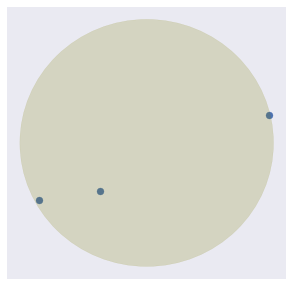

In [4]:
def incircle(x, y, r=1):
    return np.power(x, 2) + np.power(y, 2) < r


def spawn(r=1):
    x = random.uniform(-r, r)
    limits = [-np.sqrt(r - x**2), np.sqrt(r - x**2)]
    y = random.uniform(limits[0], limits[1])
    return [x, y]


# Good score when somewhere < 2
def checkScore(coord):
    totalDist = 0
    for i in range(len(coord)):
        for j in range(i, len(coord)):
            if i != j:
                totalDist += 1 / abs(
                    math.hypot(coord[j][0] - coord[i][0],
                               coord[j][1] - coord[i][1]))
    return totalDist


def changeCoord(coord):
    i = random.randint(0, len(coord) - 1)
    coord[i] = spawn()
    return coord


def getScheme_data(iters, plot="No"):
    linspace = np.linspace(0, 9, iters)
    answer = []

    for x in linspace:
        answer.append(0.5 +
                      math.erf((math.sqrt(math.pi) / 2) * (x - 2)) * -0.5)

    if plot == "Yes":
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
        ax.plot(answer, label="Acceptance chance")
        plotpretify(ax, iters)
        plt.show()
    return answer


coordList = []
for i in range(3):
    coordList.append(spawn(1))
coordList = np.array(coordList)

iterations = 0
score = checkScore(coordList)
scheme = getScheme_data(iterations, plot="No")
for i in range(iterations):
    tmpList = changeCoord(coordList)
    tmpScore = checkScore(tmpList)
    if score < checkScore(coordList):
        coordList = tmpList
        score = tmpScore
    if scheme[i] > np.random.uniform():
        coordList = tmpList
        score = tmpScore
print(score)

plt.rcParams['figure.figsize'] = [5, 5]
sns.set()
sns.set_style("dark")
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(coordList[:, 0], coordList[:, 1])
circle1 = plt.Circle((0, 0), 1, alpha=0.2, color="olive")
ax.add_artist(circle1)
plotpretify(
    ax, 1.1, minx=-1.1, miny=-1.1, maxy=1.1, Grid=False, LL=False, LB=False)

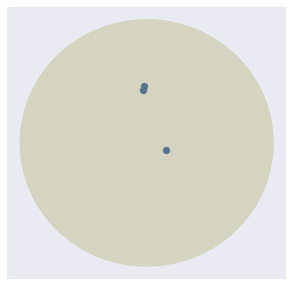

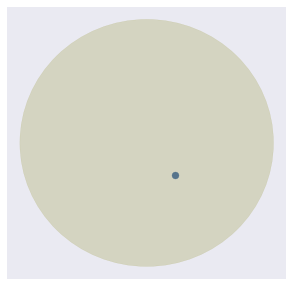

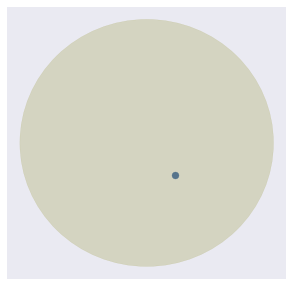

In [7]:
def incircle(x, y, r=1):
    return np.power(x, 2) + np.power(y, 2) < r


def spawn(r=1):
    x = random.uniform(-r, r)
    limits = [-np.sqrt(r - x**2), np.sqrt(r - x**2)]
    y = random.uniform(limits[0], limits[1])
    return [x, y]


# Good score when somewhere < 2
def checkScore(coord):
    totalDist = 0
    for i in range(len(coord)):
        for j in range(i, len(coord)):
            if i != j:
                totalDist += 1 / abs(
                    math.hypot(coord[j][0] - coord[i][0],
                               coord[j][1] - coord[i][1]))
    return totalDist


def move(k, coord, temp):
    F = np.array([0.0,0.0])
    velocity = np.zeros(2, float)
    for l in coord:
        if all(l != k):
            # Methode 1:
            r = np.array(k) - np.array(l)
            F1 = r / (np.linalg.norm(r)**3)*0.03*temp
            F += F1
            
            # Methode2:
            delta = np.array(k) - np.array(l)
            delta2 = delta * delta
            dist2 = delta2.sum()
            force = 1.0 / (dist2*dist2)
            velocity += delta * force * temp * 0.05
    return (k + F) # F can be replaced by 'velocity'


def changeCoord(coord, temp):
    coordTemp = []
    for i, k in enumerate(coord):
        coordTemp.append(move(k, coord, temp))
    return np.array(coordTemp)


def getScheme_data(iters, plot="No"):
    linspace = np.linspace(0, 9, iters)
    answer = []

    for x in linspace:
        answer.append(0.5 +
                      math.erf((math.sqrt(math.pi) / 2) * (x - 2)) * -0.5)

    if plot == "Yes":
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
        ax.plot(answer, label="Acceptance chance")
        plotpretify(ax, iters)
        plt.show()
    return answer


coordList = []
for i in range(3):
    coordList.append(spawn(0.5))
coordList = np.array(coordList)

iterations = 2

# score = checkScore(coordList)
# scheme = getScheme_data(iterations, plot="No")
# for i in range(iterations):
#     tmpList = changeCoord(coordList)
#     tmpScore = checkScore(tmpList)
#     if score < checkScore(coordList):
#         coordList = tmpList
#         score = tmpScore
#     if scheme[i] > np.random.uniform():
#         coordList = tmpList
#         score = tmpScore
# print(score)


def plot(coordList):
    plt.rcParams['figure.figsize'] = [5, 5]
    sns.set()
    sns.set_style("dark")
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.scatter(coordList[:, 0], coordList[:, 1])
    circle1 = plt.Circle((0, 0), 1, alpha=0.2, color="olive")
    ax.add_artist(circle1)
    plotpretify(
        ax,
        1.1,
        minx=-1.1,
        miny=-1.1,
        maxy=1.1,
        Grid=False,
        LL=False,
        LB=False)

plot(coordList)

for i in range(iterations):
    temp = np.exp(-i/3.0)
    coordList = changeCoord(coordList, temp)
    plot(coordList)

In [6]:
def chemParticleDynamics(numSteps=5000, bondLen=1.0,
                         timeStep=0.01, updateFunc=None):

#   atoms = list(bondDict.keys())  # list() not needed in Python 2
  numAtoms = 3
  atomCoords = random.uniform(-10.0, 10.0, (3, 3))
  print(atomCoords)

  indices = range(numAtoms)
  n = float(numSteps)

  for step in range(numSteps): # could use xrange in Python 2
    temp = exp(-step/n)

    if updateFunc: # Extra for graphical display
      print("Step:", step)
      updateFunc(atomCoords)

    for i in indices[1:]:
      atom = atoms[i]
      coords = atomCoords[i]
      velocity = zeros(3, float)

      for j in indices:
        if i == j:
          continue

        delta = coords - atomCoords[j]
        delta2 = delta * delta
        dist2 = delta2.sum()

        bound = bondDict[atoms[j]]
        if atom in bound:
          force = bondLen - sqrt(dist2)

        else:
          force = 1.0 / (dist2*dist2)

        force = min(max(-200.0, force), 200.0)
        velocity += delta * force * temp * timeStep

      atomCoords[i] += velocity

  center = atomCoords.mean(axis=0)
  atomCoords = atomCoords-center

  return atomCoords

chemParticleDynamics()

TypeError: uniform() takes 3 positional arguments but 4 were given

In [114]:
def plot(coordList):
    plt.rcParams['figure.figsize'] = [10, 10]
    sns.set()
    sns.set_style("dark")
    fig = plt.figure()
    ax = plt.subplot(111)
    colors = list(range(len(coordList)))
    ax.scatter(coordList[:, 0], coordList[:, 1], c=colors, cmap='Dark2')
    circle1 = plt.Circle((0, 0), radius, alpha=0.2, color="olive")
    ax.add_artist(circle1)
    plotpretify(
        ax,
        1.1,
        minx=-1.1,
        miny=-1.1,
        maxy=1.1,
        Grid=False,
        LL=False,
        LB=False)


def getScheme_data(iters, plot="No"):
    linspace = np.linspace(0, 9, iters)
    answer = []

    for x in linspace:
        answer.append(0.5 +
                      math.erf((math.sqrt(math.pi) / 2) * (x - 2)) * -0.5)

    if plot == "Yes":
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
        ax.plot(answer, label="Acceptance chance")
        plotpretify(ax, iters)
        plt.show()
    return answer


def incircle(crds, r=1):
    return np.power(crds[0], 2) + np.power(crds[1], 2) < r


def spawn(r=1):
    x = random.uniform(-r, r)
    limits = [-np.sqrt(r**2 - x**2), np.sqrt(r**2 - x**2)]
    y = random.uniform(limits[0], limits[1])
    return [x, y]


# Good score when somewhere < 2
def checkScore(coord):
    totalDist = 0
    for i in range(len(coord)):
        for j in range(i, len(coord)):
            if i != j:
                totalDist += 1 / abs(
                    math.hypot(coord[j][0] - coord[i][0],
                               coord[j][1] - coord[i][1]))
    return totalDist


def move(k, coord, temp, rate):
    F = np.array([0.0, 0.0])
    velocity = np.zeros(2, float)
    for l in coord:
        if any(l != k):
            # Methode 1:
            r = np.array(k) - np.array(l)
            F1 = (r / (np.linalg.norm(r)**3) * rate) * temp
            F += F1

            # Methode2:
            force = 1 / (np.sum(r**2)**2)
            velocity += (r * force * rate) * temp
    newPoint = k + F
    if not incircle(newPoint, radius):
        newPoint = newPoint / la.norm(newPoint)
    return newPoint  


def changeCoord(coord, temp, rate):
    coordTemp = []
    for i, k in enumerate(coord):
        coordTemp.append(move(k, coord, temp, rate))
    return np.array(coordTemp)


coordList = []
radius = 1
pointsNum = 70
iterations = 500
rate = 0.0005

for i in range(pointsNum):
    coordList.append(spawn(radius))
coordList = np.array(coordList)

# 2 points:
# coordList = [[-1,0], [-0.5,0]]
# coordList = [[-1,0], [-0.5,0.3]]
# coordList = [[0.2,0.2], [-0.5,0.3]]

# 3 points:
# coordList = [[0.2,0.2], [-0.5,0.3], [-0.1, -0.2]]
coordList = np.array(coordList)


# print(coordList)
# plot(coordList)

coordListList = [coordList]
for i in range(iterations):
    temp = np.exp(-i / iterations) / 10
    temp = 1
    coordList = changeCoord(coordList, temp, rate)
    coordListList.append(coordList)

In [117]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

def showPlot(i=0):
    plot(coordListList[i])
    
# showPlot(coordListList)
y=interactive(showPlot, i=(0,len(coordListList)-1,1))
display(y)

interactive(children=(IntSlider(value=0, description='i', max=500), Output()), _dom_classes=('widget-interact'…